In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [7]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///SurfsUp/Resources/hawaii.sqlite")

In [9]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [10]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [15]:
# Find the most recent date in the data set.

session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

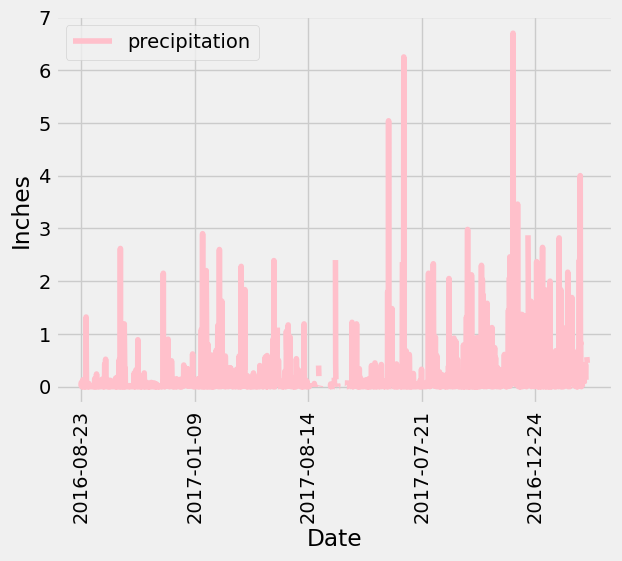

In [72]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.

year_before = dt.date(2017,8,23)- dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores

scores = session.query(measurement.date, measurement.prcp).filter(measurement.date >= year_before).all()

# Save the query results as a Pandas DataFrame and set the index to the date column

results = pd.DataFrame(scores, columns = ['date', 'precipitation'])
results = results.set_index(results['date'])

results
# Sort the dataframe by date
results.sort_index(ascending=False)

# Use Pandas Plotting with Matplotlib to plot the data

results.plot('date', 'precipitation', color='pink')
plt.xticks(rotation = 90)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.show()



In [37]:
# Use Pandas to calcualte the summary statistics for the precipitation data

results.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [40]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(station.name)).all()

[(9,)]

In [56]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(measurement.station, func.count(measurement.id)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.id).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [59]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.max(measurement.tobs), func.min(measurement.tobs), func.avg(measurement.tobs)).all()

[(87.0, 53.0, 73.09795396419437)]

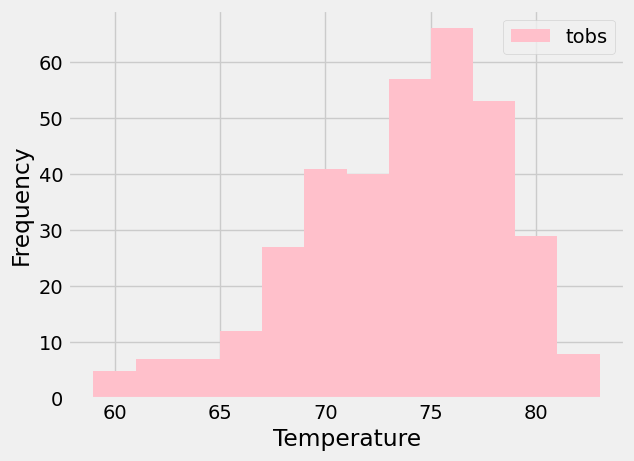

In [69]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
s_USC00519281 = session.query(measurement.station, measurement.tobs)\
    .filter(measurement.date >= '2016-08-23')\
    .filter(measurement.station == 'USC00519281')\
    .all()
s_USC00519281df = pd.DataFrame(s_USC00519281)
s_USC00519281df.head()

s_USC00519281df.plot.hist(bins=12, color='pink')
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

# Close session

In [73]:
# Close Session
session.close()